In [ ]:
from google.colab import drive
 
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import folium
import numpy as np
import json 
import requests
import branca
from folium.plugins import HeatMap
from branca.colormap import linear
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
from folium import plugins
from branca.colormap import linear

In [ ]:
# data importing

df1 = pd.read_csv("/content/gdrive/My Drive/워밍업프로젝트1/PatientInfo.csv")
df2 = pd.read_csv("/content/gdrive/My Drive/워밍업프로젝트1/PatientRoute.csv")

df1.head(10)

patient_id  global_num     sex  ...  released_date deceased_date     state
0  1000000001         2.0    male  ...     2020-02-05           NaN  released
1  1000000002         5.0    male  ...     2020-03-02           NaN  released
2  1000000003         6.0    male  ...     2020-02-19           NaN  released
3  1000000004         7.0    male  ...     2020-02-15           NaN  released
4  1000000005         9.0  female  ...     2020-02-24           NaN  released
5  1000000006        10.0  female  ...     2020-02-19           NaN  released
6  1000000007        11.0    male  ...     2020-02-10           NaN  released
7  1000000008        13.0    male  ...     2020-02-24           NaN  released
8  1000000009        19.0    male  ...     2020-02-21           NaN  released
9  1000000010        21.0  female  ...     2020-02-29           NaN  released

[10 rows x 18 columns]

In [ ]:
df2.head(10)

patient_id  global_num  ...   latitude   longitude
0  1000000001         2.0  ...  37.615246  126.715632
1  1000000001         2.0  ...  37.567241  127.005659
2  1000000002         5.0  ...  37.592560  127.017048
3  1000000002         5.0  ...  37.591810  127.016822
4  1000000002         5.0  ...  37.563992  127.029534
5  1000000002         5.0  ...  37.590330  127.015221
6  1000000002         5.0  ...  37.589590  127.009766
7  1000000002         5.0  ...  37.592057  127.018898
8  1000000002         5.0  ...  37.566262  127.065815
9  1000000002         5.0  ...  37.591669  127.018420

[10 rows x 8 columns]

In [ ]:
# 집단 감염 시각화 및 그룹화 작업을 통해, 사용자가 보고 싶은 집단감염지를 입력한다.
total_df = df1.merge(df2, on="patient_id")

In [ ]:
total_df.head(3)

patient_id  global_num_x   sex  ...      type   latitude   longitude
0  1000000001           2.0  male  ...   airport  37.615246  126.715632
1  1000000001           2.0  male  ...  hospital  37.567241  127.005659
2  1000000002           5.0  male  ...       etc  37.592560  127.017048

[3 rows x 25 columns]

In [ ]:
total_df.columns

Index(['patient_id', 'global_num_x', 'sex', 'birth_year', 'age', 'country',
       'province_x', 'city_x', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'global_num_y', 'date',
       'province_y', 'city_y', 'type', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 0 to 8091
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          8092 non-null   int64  
 1   global_num_x        4828 non-null   float64
 2   sex                 6712 non-null   object 
 3   birth_year          6078 non-null   float64
 4   age                 6712 non-null   object 
 5   country             8092 non-null   object 
 6   province_x          8092 non-null   object 
 7   city_x              7948 non-null   object 
 8   disease             8 non-null      object 
 9   infection_case      7658 non-null   object 
 10  infection_order     130 non-null    float64
 11  infected_by         1861 non-null   object 
 12  contact_number      2418 non-null   object 
 13  symptom_onset_date  1592 non-null   object 
 14  confirmed_date      8092 non-null   object 
 15  released_date       2556 non-null   object 
 16  deceas

In [ ]:
df3 = total_df[["patient_id", "sex", "age", "province_x", "city_x", "infection_case", "infected_by", "contact_number",
                "state", "date", "province_y", "city_y", "type", "latitude", "longitude"]]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 0 to 8091
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      8092 non-null   int64  
 1   sex             6712 non-null   object 
 2   age             6712 non-null   object 
 3   province_x      8092 non-null   object 
 4   city_x          7948 non-null   object 
 5   infection_case  7658 non-null   object 
 6   infected_by     1861 non-null   object 
 7   contact_number  2418 non-null   object 
 8   state           8092 non-null   object 
 9   date            8092 non-null   object 
 10  province_y      8092 non-null   object 
 11  city_y          8092 non-null   object 
 12  type            8092 non-null   object 
 13  latitude        8092 non-null   float64
 14  longitude       8092 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1011.5+ KB


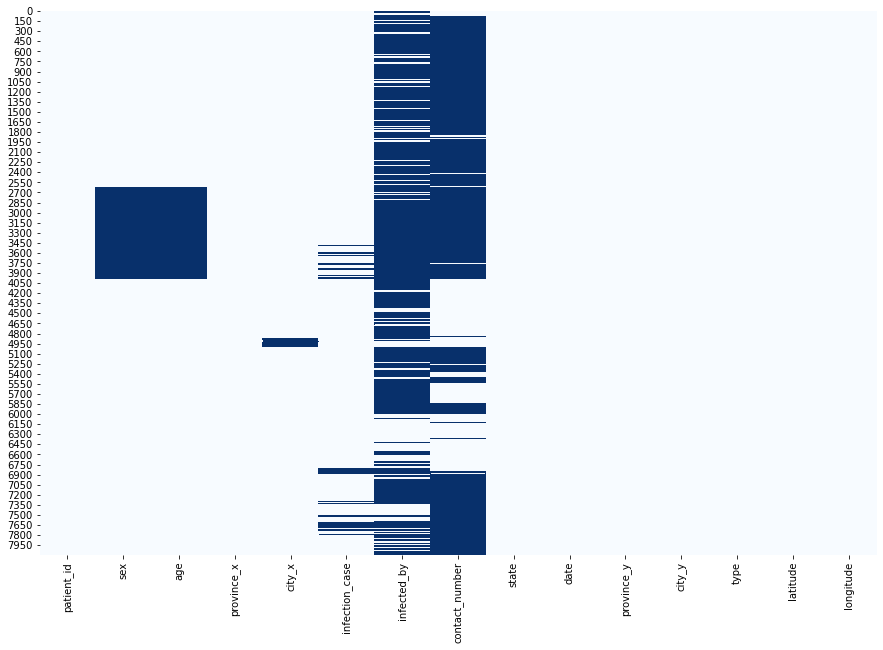

In [ ]:
#결측치 시각화 !
plt.figure(figsize=(15,10))
sns.heatmap(df3.isnull(), cmap="Blues", cbar=False)

plt.show()

In [ ]:
df3.infection_case.value_counts()

contact with patient                2111
etc                                 1516
overseas inflow                     1357
Itaewon Clubs                        664
Guro-gu Call Center                  512
Shincheonji Church                   450
Onchun Church                        239
gym facility in Cheonan              234
Dongan Church                        124
Coupang Logistics Center              89
KB Life Insurance                     71
Eunpyeong St. Mary's Hospital         65
Guri Collective Infection             56
Seongdong-gu APT                      41
Changnyeong Coin Karaoke              38
Ministry of Oceans and Fisheries      28
Samsung Medical Center                27
Suyeong-gu Kindergarten               13
Yeongdeungpo Learning Institute        8
Cheongdo Daenam Hospital               6
Geochang Church                        5
River of Grace Community Church        4
Name: infection_case, dtype: int64

In [ ]:
df3.age = df3.age.str.replace('s', '')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df3.age = df3.age.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df3.age = df3.age.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df3.age = df3.age.astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df3.age.isnull().sum()

0

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 0 to 8091
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      8092 non-null   int64  
 1   sex             6712 non-null   object 
 2   age             8092 non-null   int64  
 3   province_x      8092 non-null   object 
 4   city_x          7948 non-null   object 
 5   infection_case  7658 non-null   object 
 6   infected_by     1861 non-null   object 
 7   contact_number  2418 non-null   object 
 8   state           8092 non-null   object 
 9   date            8092 non-null   object 
 10  province_y      8092 non-null   object 
 11  city_y          8092 non-null   object 
 12  type            8092 non-null   object 
 13  latitude        8092 non-null   float64
 14  longitude       8092 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 1011.5+ KB


In [ ]:
#신천지 -> sc
#구로구 콜센터 -> gc
#이태원 클럽 -> ic
#온천교회 -> oc

df3.infection_case.unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Itaewon Clubs',
       'Samsung Medical Center', nan, 'Coupang Logistics Center',
       'Guri Collective Infection', 'KB Life Insurance',
       'Yeongdeungpo Learning Institute', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten',
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'River of Grace Community Church', 'Changnyeong Coin Karaoke',
       'Geochang Church'], dtype=object)

In [ ]:
df3.state.unique()

array(['released', 'deceased', 'isolated'], dtype=object)

In [ ]:
case = pd.Series(df3.state)
case = list(case)

case_list = []
for i in case:
    if i == "released":
        case_list.append("완치")
    elif i == "deceased":
        case_list.append("사망")
    elif i == "isolated":
        case_list.append("격리 중")

print(case_list)

['완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '사망', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치', '완치

In [ ]:
df3.contact_number = df3.contact_number.fillna("0")

df3.contact_number = df3.contact_number + "명"

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df3.contact_number

0       75명
1       75명
2       31명
3       31명
4       31명
       ... 
8087     0명
8088     0명
8089     0명
8090     0명
8091     0명
Name: contact_number, Length: 8092, dtype: object

In [ ]:
sc = df3[df3.infection_case == "Shincheonji Church"] #신천지

gc = df3[df3.infection_case == "Guro-gu Call Center"] #구로구 콜센터 그룹화

ic = df3[df3.infection_case == "Itaewon Clubs"] #이태원 클럽 그룹화

oc = df3[df3.infection_case == "Onchun Church"] #온천교회 그룹화

gf = df3[df3.infection_case == "gym facility in Cheonan"] #천안 헬스장 그룹화

dc = df3[df3.infection_case == "Dongan Church"] #동안교회 그룹화

cl = df3[df3.infection_case == "Coupang Logistics Center"] #쿠팡 물류센터 그룹화

In [ ]:
print(type(sc))

cl.head(3)

<class 'pandas.core.frame.DataFrame'>


patient_id  sex  age  ...      type   latitude   longitude
3620  1000000796  NaN    0  ...  hospital  37.602452  126.928847
3621  1000000796  NaN    0  ...  hospital  37.511972  126.833222
3622  1000000797  NaN    0  ...       etc  37.526675  126.761714

[3 rows x 15 columns]

In [ ]:
sc.infection_case = sc.infection_case.replace("Shincheonji Church", "신천지증거장막성전")

gc.infection_case = gc.infection_case.replace("Guro-gu Call Center", "구로구 콜센터")

ic.infection_case = ic.infection_case.replace("Itaewon Clubs", "이태원클럽")

oc.infection_case = oc.infection_case.replace("Onchun Church", "온천제일교회")

gf.infection_case = gf.infection_case.replace("gym facility in Cheonan", "천안헬스클럽")

dc.infection_case = dc.infection_case.replace("Dongan Church", "동안교회")

cl.infection_case = cl.infection_case.replace("Coupang Logistics Center", "쿠팡물류센터")


cl

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


patient_id  sex  age  ...      type   latitude   longitude
3620  1000000796  NaN    0  ...  hospital  37.602452  126.928847
3621  1000000796  NaN    0  ...  hospital  37.511972  126.833222
3622  1000000797  NaN    0  ...       etc  37.526675  126.761714
3623  1000000797  NaN    0  ...  hospital  37.500076  126.889324
3631  1000000799  NaN    0  ...       etc  37.530307  126.775233
...          ...  ...  ...  ...       ...        ...         ...
3808  1000000828  NaN    0  ...  hospital  37.512406  126.833116
3868  1000000837  NaN    0  ...  hospital  37.549605  126.868277
3869  1000000837  NaN    0  ...  hospital  37.549605  126.868277
3882  1000000840  NaN    0  ...  hospital  37.451853  126.902036
3883  1000000840  NaN    0  ...  hospital  37.512406  126.833116

[89 rows x 15 columns]

In [ ]:
sc.head(3)

patient_id   sex  age  ...    type   latitude   longitude
99   1000000023  male   50  ...  church  35.841206  128.598243
100  1000000023  male   50  ...     etc  37.477840  126.987315
101  1000000023  male   50  ...  church  37.435023  126.991583

[3 rows x 15 columns]

In [ ]:
cl.head(3)

patient_id  sex  age  ...      type   latitude   longitude
3620  1000000796  NaN    0  ...  hospital  37.602452  126.928847
3621  1000000796  NaN    0  ...  hospital  37.511972  126.833222
3622  1000000797  NaN    0  ...       etc  37.526675  126.761714

[3 rows x 15 columns]

In [ ]:
#지도 생성
m = folium.Map(
    location=[37.340034, 127.957575], #팀장의 주소인 강원도 원주시 개운동의 좌표 입력
    zoom_start=15,
    tiles = "OpenStreetMap"
)


#부모-자식 지도 그룹 생성
gs = folium.FeatureGroup(name="total groups")
m.add_child(gs)
g1 = plugins.FeatureGroupSubGroup(gs, "신천지증거장막성전(Red)")
m.add_child(g1)
g2 = plugins.FeatureGroupSubGroup(gs, "구로구 콜센터(Blue)")
m.add_child(g2)
g3 = plugins.FeatureGroupSubGroup(gs, "이태원 클럽(Green)")
m.add_child(g3)
g4 = plugins.FeatureGroupSubGroup(gs, "온천제일교회(Black)")
m.add_child(g4)
g5 = plugins.FeatureGroupSubGroup(gs, "천안헬스클럽(Purple)")
m.add_child(g5)
g6 = plugins.FeatureGroupSubGroup(gs, "동안교회(Yellow)")
m.add_child(g6)
g7 = plugins.FeatureGroupSubGroup(gs, "쿠팡물류센터(Orange)")
m.add_child(g7)

#신천지 그룹화
for a, c, d, num, s, lat, lon in zip(sc.age, sc.infection_case,
                                     sc.date, sc.contact_number, sc.state,
                                     sc.latitude, sc.longitude):
    
    #html = f"<table border='2'><th>id</th><th>나이</th><th>감염경로</th><th>방문일자</th><th>접촉자 수</th><th>환자 현재상태</th><tr><td>{i}</td><td>{a}</td><td>{c}</td><td>{d}</td><td>{num}</td><td>{s}</td></tr></table>"
    
    html = """<table border='3'width="200" height="300">
    <tr><td>나이</td><td>{}</td></tr>
    <tr><td>감염경로</td><td>{}</td></tr>
    <tr><td>방문일자</td><td>{}</td></tr>
    <tr><td>접촉자 수</td><td>{}</td></tr>
    <tr><td>환자 현재상태</td><td>{}</td></tr>
    </table>""".format(a, c, d, num, s)


    folium.Marker(
        [lat, lon],
        popup = html,
        icon = folium.Icon(color="red", icon="info-sign")
    ).add_to(g1)

#구로구 콜센터 그룹화
for i, a, c, d, num, s, lat, lon in zip(gc.patient_id, gc.age, gc.infection_case,
                                     gc.date, gc.contact_number, gc.state,
                                     gc.latitude, gc.longitude):
    
    html = """<table border='3'width="200" height="300">
    <tr><td>나이</td><td>{}</td></tr>
    <tr><td>감염경로</td><td>{}</td></tr>
    <tr><td>방문일자</td><td>{}</td></tr>
    <tr><td>접촉자 수</td><td>{}</td></tr>
    <tr><td>환자 현재상태</td><td>{}</td></tr>
    </table>""".format(a, c, d, num, s)


    folium.Marker(
        [lat, lon],
        popup = html,
        icon = folium.Icon(color="blue", icon="info-sign")
    ).add_to(g2)


#이태원 클럽 그룹화
for i, a, c, d, num, s, lat, lon in zip(ic.patient_id, ic.age, ic.infection_case,
                                     ic.date, ic.contact_number, ic.state,
                                     ic.latitude, ic.longitude):
    
    html = """<table border='3'width="200" height="300">
    <tr><td>나이</td><td>{}</td></tr>
    <tr><td>감염경로</td><td>{}</td></tr>
    <tr><td>방문일자</td><td>{}</td></tr>
    <tr><td>접촉자 수</td><td>{}</td></tr>
    <tr><td>환자 현재상태</td><td>{}</td></tr>
    </table>""".format(a, c, d, num, s)

    folium.Marker(
        [lat, lon],
        popup = html,
        icon = folium.Icon(color="green", icon="info-sign")
    ).add_to(g3)


#온천교회 그룹화
for i, a, c, d, num, s, lat, lon in zip(oc.patient_id, oc.age, oc.infection_case,
                                     oc.date, oc.contact_number, oc.state,
                                     oc.latitude, oc.longitude):
    
    html = """<table border='3'width="200" height="300">
    <tr><td>나이</td><td>{}</td></tr>
    <tr><td>감염경로</td><td>{}</td></tr>
    <tr><td>방문일자</td><td>{}</td></tr>
    <tr><td>접촉자 수</td><td>{}</td></tr>
    <tr><td>환자 현재상태</td><td>{}</td></tr>
    </table>""".format(a, c, d, num, s)
    
    folium.Marker(
        [lat, lon],
        popup = html,
        icon = folium.Icon(color="black", icon="info-sign")
    ).add_to(g4)


#천안헬스장 그룹화
for i, a, c, d, num, s, lat, lon in zip(gf.patient_id, gf.age, gf.infection_case,
                                     gf.date, gf.contact_number, gf.state,
                                     gf.latitude, gf.longitude):

    html = """<table border='3'width="200" height="300">
    <tr><td>나이</td><td>{}</td></tr>
    <tr><td>감염경로</td><td>{}</td></tr>
    <tr><td>방문일자</td><td>{}</td></tr>
    <tr><td>접촉자 수</td><td>{}</td></tr>
    <tr><td>환자 현재상태</td><td>{}</td></tr>
    </table>""".format(a, c, d, num, s)

    folium.Marker(
        [lat, lon],
        popup = html,
        icon = folium.Icon(color="purple", icon="info-sign")
    ).add_to(g5)


#동안교회 그룹화
for i, a, c, d, num, s, lat, lon in zip(dc.patient_id, dc.age, dc.infection_case,
                                     dc.date, dc.contact_number, dc.state,
                                     dc.latitude, dc.longitude):

    html = """<table border='3'width="200" height="300">
    <tr><td>나이</td><td>{}</td></tr>
    <tr><td>감염경로</td><td>{}</td></tr>
    <tr><td>방문일자</td><td>{}</td></tr>
    <tr><td>접촉자 수</td><td>{}</td></tr>
    <tr><td>환자 현재상태</td><td>{}</td></tr>
    </table>""".format(a, c, d, num, s)

    folium.Marker(
        [lat, lon],
        popup = html,
        icon = folium.Icon(color="yellow", icon="info-sign")
    ).add_to(g6)


#쿠팡 물류센터 그룹화
for i, a, c, d, num, s, lat, lon in zip(cl.patient_id, cl.age, cl.infection_case,
                                     cl.date, cl.contact_number, cl.state,
                                     cl.latitude, cl.longitude):

    html = """<table border='3'width="200" height="300">
    <tr><td>나이</td><td>{}</td></tr>
    <tr><td>감염경로</td><td>{}</td></tr>
    <tr><td>방문일자</td><td>{}</td></tr>
    <tr><td>접촉자 수</td><td>{}</td></tr>
    <tr><td>환자 현재상태</td><td>{}</td></tr>
    </table>""".format(a, c, d, num, s)
        
    folium.Marker(
        [lat, lon],
        popup = html,
        icon = folium.Icon(color="orange", icon="info-sign")
    ).add_to(g7)

#출력
folium.LayerControl(collapsed=False).add_to(m)

m

In [ ]:
#파일로 저장하기
m.save("GroupInfectionMap_20200906_6.html")